#### 1. Create Greenberger-Horne-Zeilenger state for n qubits (|00...0> + |11...1>)/sqrt(2) using QISKIT

In [1]:
import numpy as np
from numpy.random import default_rng

from qiskit import *
from qiskit.quantum_info import Statevector
from qiskit.providers.aer import Aer
from qiskit import QuantumCircuit

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

statevec_sim = Aer.get_backend("statevector_simulator")


c:\users\tchakhm2\appdata\local\programs\python\python39\lib\site-packages\qiskit\quantum_info\operators\base_operator.py:86: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self._set_dims(input_dims, output_dims)
c:\users\tchakhm2\appdata\local\programs\python\python39\lib\site-packages\qiskit\quantum_info\operators\base_operator.py:86: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self._set_dims(input_dims, output_dims)
c:\users\tchakhm2\appdata\local\programs\python\python39\lib\site-packages\qiskit\quantum_info\operators\base_operator.py:86: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  self._set_dims(input_dims, output_dims)
c:\users\tchakhm2\appdata\local\programs\python\python39\lib\site-packages\qiskit\quantum_info\operators\base_operator.py

In [2]:
def create_Swap_gates(circ, num_q):

    circ.cx(0, 1)
    if num_q > 2:
        for i in range(1, num_q-1):
            qc.swap(i, i+1)
        
        create_Swap_gates(circ, num_q-1)
    
    return (circ)


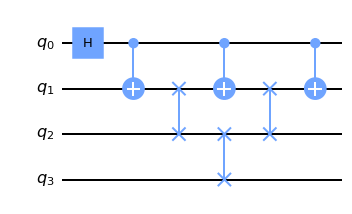

In [3]:
# create circuit and initialize qubit
num_of_qubits = 4
qc = QuantumCircuit(num_of_qubits)
qc.h(0)     # Hadamard gate on a 1st qubit
create_Swap_gates(qc, num_of_qubits)

qc.draw(output='mpl')

In [4]:
res = execute(qc, backend = statevec_sim).result()
statevec = res.get_statevector()
    
print(statevec)


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


#### 2. Create Greenberger-Horne-Zeilenger state for n qubits (|00...0> + |11...1>)/sqrt(2) using Matrix Product State

In [5]:
import tensornetwork as tn
import numpy as np
import math

In [6]:
def create_GHZ_MPS(dim):
  '''Build the MPS tensor'''
  T = np.array( [ [[1,0],[0,0]] , [[0,0],[0,1]] ])

  mps = []
  for _ in range(dim):
    mps.append(tn.Node(T))

  #connect edges to build mps
  for k in range(dim-1):
    mps[k][2]^mps[k+1][0]

  mps[0][0]^mps[dim-1][2]  # trace edge between first & last node

  return mps

In [7]:
n_qub = 4 # number of qubits
GHZ_mps = create_GHZ_MPS(n_qub)

GHZ_result = tn.contractors.auto(GHZ_mps, ignore_edge_order=True)
print(GHZ_result.tensor.reshape(2**n_qub)/math.sqrt(2))

[0.70710678 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.70710678]


#### 3. Create W state for n qubits (|00...0> + |11...1>)/sqrt(2) using MPS

In [8]:
def create_W_MPS(dim):
  '''Build the MPS tensor'''
  T1 = np.array( [ [[1,0],[0,1]] , [[0,1],[0,0]] ]) # first (dim-1) tensors
  T2 = np.array( [ [[0,1],[1,0]] , [[1,0],[0,0]] ]) / math.sqrt(dim) # last tensor

  mps = []
  for _ in range(dim-1):      # all tensors except last one
    mps.append(tn.Node(T1))
  
  mps.append(tn.Node(T2))       # add last tensor

  #connect edges to build mps
  for k in range(dim-1):
    mps[k][2]^mps[k+1][0]

  mps[0][0]^mps[dim-1][2]  # trace edge between first & last node

  return mps

In [9]:
n_qub = 3 # number of qubits
W_mps = create_W_MPS(n_qub)

W_result = tn.contractors.auto(W_mps, ignore_edge_order=True)
print(W_result.tensor.reshape(2**n_qub))

# W-state is (|001> + |010> + |100>)/3
# first non-zero element corresponds to |001>, second non-zero is |010>, and last - |100>


[0.         0.57735027 0.57735027 0.         0.57735027 0.
 0.         0.        ]


In [10]:
n_qub = 6 # number of qubits
W_mps = create_W_MPS(n_qub)

W_result = tn.contractors.auto(W_mps, ignore_edge_order=True)
print(W_result.tensor.reshape(2**n_qub))
# W-state is (|000001> + |000010> + |000100> + |001000> + |010000> + |100000>)/6

[0.         0.40824829 0.40824829 0.         0.40824829 0.
 0.         0.         0.40824829 0.         0.         0.
 0.         0.         0.         0.         0.40824829 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.40824829 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
